<a href="https://colab.research.google.com/github/rafatb/Berlin_Airbnb_Price_Prediction/blob/main/2-airbnb-berline-feature-engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stage 3- Airbnb Berline - Feature Engineering**

After cleaning and filling the missing data , in this stage we will enrich the data with releviant information that will affect the prediction model.

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
# !pip install missingno
# !pip install autoviz
# !pip install geopy
# !pip install scipy
# !pandas_profiling
# !pip install statsmodels
# !pip install pyodbc
# !pip install seaborn
# !pip install nltk
# !pip install folium

In [71]:
import numpy as np
import os
import pandas as pd
#from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import ensemble, tree, linear_model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr
import pyodbc
import seaborn as sns
sns.set()
plt.style.use('ggplot')
import re
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ks_2samp
from scipy.stats import norm
import missingno as msno
import warnings
import datetime
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import nltk
import re
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ks_2samp
from scipy.stats import norm
import missingno as msno
import datetime
import folium
from folium.plugins import FastMarkerCluster # Import FastMarkerCluster from folium.plugins
from  geopy.geocoders import Nominatim
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
df = pd.read_pickle("/content/drive/MyDrive/kaggle/berline/ready_for_feature_engineering.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23536 entries, 0 to 23535
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Overall Rating        23536 non-null  float64
 1   Accuracy Rating       23536 non-null  float64
 2   Cleanliness Rating    23536 non-null  float64
 3   Checkin Rating        23536 non-null  float64
 4   Communication Rating  23536 non-null  float64
 5   Location Rating       23536 non-null  float64
 6   Value Rating          23536 non-null  float64
 7   Price                 23536 non-null  float64
 8   Reviews               23536 non-null  float64
 9   Bedrooms              23536 non-null  float64
 10  Beds                  23536 non-null  float64
 11  Bathrooms             23536 non-null  float64
 12  Is Superhost          23536 non-null  bool   
 13  Latitude              23536 non-null  float64
 14  Longitude             23536 non-null  float64
 15  Accomodates        

In [73]:
df.head(5)

,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Price,Reviews,Bedrooms,Beds,Bathrooms,Is Superhost,Latitude,Longitude,Accomodates,Guests Included,Min Nights,Instant Bookable,Host Since,Is Exact Location,Postal Code,Property Type,Host Response Time,Neighborhood Group,neighbourhood,Room Type
0,100.0,10.0,10.0,10.0,10.0,9.0,10.0,17.0,7.0,1.0,1.0,1.0,False,52.54851,13.40455,2.0,1.0,2.0,False,09-16-08,True,10437,Apartment,within a day,Pankow,Prenzlauer Berg,Private room
1,92.0,9.0,9.0,9.0,9.0,10.0,9.0,90.0,144.0,1.0,2.0,1.0,False,52.53500,13.41758,4.0,2.0,0.0,False,10-19-08,True,10405,Apartment,within a day,Pankow,Prenzlauer Berg,Entire home/apt
2,96.0,10.0,10.0,10.0,10.0,10.0,10.0,33.0,229.0,1.0,2.0,1.0,True,52.54316,13.41509,2.0,1.0,2.0,False,05-16-09,True,10437,Apartment,within an hour,Pankow,Prenzlauer Berg,Private room
3,100.0,10.0,10.0,10.0,10.0,10.0,10.0,180.0,6.0,4.0,7.0,0.0,False,52.53303,13.41605,0.0,5.0,6.0,False,08-25-09,False,10405,Apartment,within a day,Pankow,Prenzlauer Berg,Entire home/apt
4,93.0,10.0,10.0,9.0,10.0,9.0,9.0,70.0,23.0,0.0,1.0,1.0,False,52.54785,13.40556,1.0,1.0,0.0,False,11-18-09,True,10437,Apartment,within a day,Pankow,Prenzlauer Berg,Entire home/apt


#Interctive Map of Listings in Berline

In [74]:
lats2018 = df['Latitude'].tolist()
lons2018 = df['Longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[52.5027778, 13.404166666666667], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

#**Text**

## A Word Cloud
The following indicates the relation of the words appearance in comments by its size

In [75]:
comments_df= pd.read_csv("/content/drive/MyDrive/kaggle/berline/only_comments.csv")
comments_df.head(5)

,Unnamed: 0,Listing ID,Comments
0,0,2695,I really enjoyed staying at Micha and Nadja's ...
1,1,3176,"excellent stay, i would highly recommend it. a..."
2,2,7071,I could not have asked for a better place to s...
3,3,9991,The host was very welcoming and hospitable. He...
4,4,14325,"We had everything we needed, the apartment was..."


In [76]:
#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud


#take out empty comments (530)
comments_df = comments_df[comments_df['Comments'].notnull()]

#remove numbers
comments_df['Comments'] = comments_df['Comments'].str.replace('\d+', '')
#all to lowercase
comments_df['Comments'] = comments_df['Comments'].str.lower()
#remove windows new line
comments_df['Comments'] = comments_df['Comments'].str.replace('\r\n', "")
#remove stopwords (from nltk library)
stop_english = stopwords.words("english")
comments_df['Comments'] = comments_df['Comments'].apply(lambda x: " ".join([i for i in x.split()
                                                      if i not in (stop_english)]))
# remove punctuation
comments_df['Comments'] = comments_df['Comments'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
comments_df['Comments'] = comments_df['Comments'].str.replace('\s+', ' ')

comments_df.Comments.values[2] #print same comments again


'could asked better place stay berlin. room lovely bright says owner intelligent, cultured friendly host. would recommend!, room really lovely! quiet, comfortable bright great location lots bars, cafe\'s, shops transport right door step. perfect way introduce berlin\'s charm. family (the cat ginger i, staying bright room realy nice confortable. room full light, clean beautiful (website hidden airbnb) , host, sweet kind,discreet available. feeled sensation friend\'s house tha, wonderful, comfortable spacious room great view leafy courtyard. family considerate obliging hosts -- great stay would certainly return., daughter, anya, enjoyed stay bright room much. hospitable, felt though staying olds friends. room spacious, clean, name connotes sunny bright. highly recommend bright room , thank much! awesome time berlin. room really beautiful comfortable!can gorgeous host! hope see us again., amazing host. room warm inviting, like can. also great neighborhood stay in. , great stay bright room

In [77]:
texts = comments_df.Comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_df.head(10)

,words,counts
41,great,139831
9,apartment,127920
596,und,117232
5,place,109536
15,nice,93246
8,berlin,88886
116,location,87481
17,stay,84575
592,sehr,79775
52,clean,78644


Draw Word Cloud

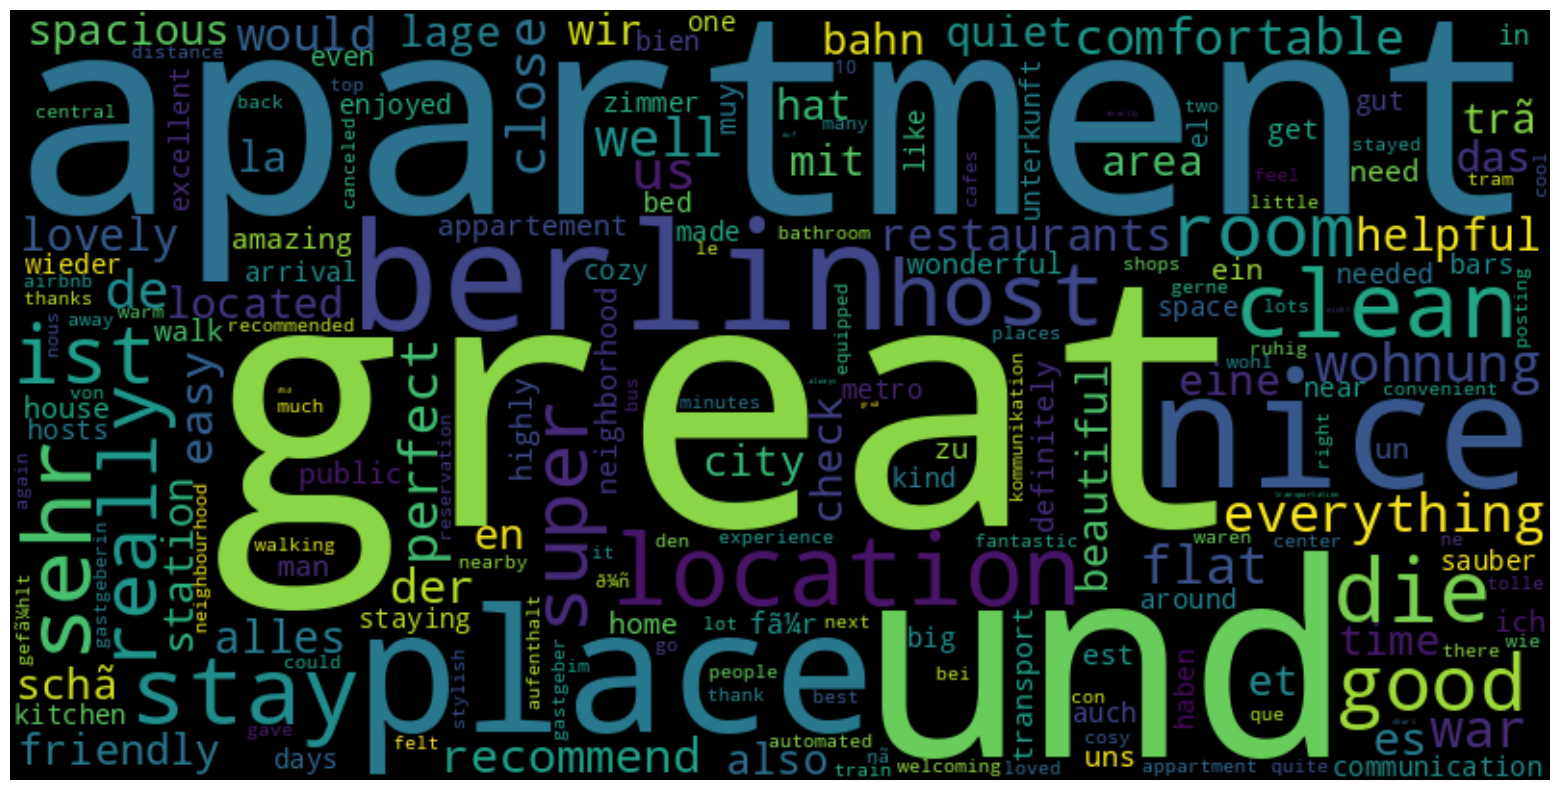

In [78]:
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Listing Distance from Berline center
we going to calculate rgw Listing Distance from Berline Center.
and check if there is any relation between destance and Price.


In [79]:
from geopy.distance import great_circle
def distance_to_mid(lat, lon):
    berlin_centre = (52.5027778, 13.404166666666667)
    accommodation = (lat, lon)
    return great_circle(berlin_centre, accommodation).km

df['Distance From Center'] = df.apply(lambda row: round(distance_to_mid(row['Latitude'], row['Longitude']), 1), axis=1)
bins = [0, 0.5, 1, 2, 4, 6, 8, 10 , 12, 14, 16,30]
#bins = [0, 0.5, 1, 2, 4, 8, 16]
labels = ["Circle_0", "Circle_0.5_KM", "Circle_1_KM", "Circle_2_KM", "Circle_4_KM", "Circle_8_KM","Circle_10_KM","Circle_12_KM","Circle_14_KM", "Circle_16_KM","Circle_20+_KM"]

# Apply pd.cut() to create a new binned column
df["Distance From Center Grouped"] = pd.cut(df["Distance From Center"], bins=bins, labels=labels, include_lowest=True)
# df_aggregated.drop(columns=["Distance From Center Cleansed"], inplace=True)
# df_aggregated.drop(columns=["Latitude","Longitude"], inplace=True)
df[["Distance From Center","Distance From Center Grouped"]]


,Distance From Center,Distance From Center Grouped
0,5.1,Circle_4_KM
1,3.7,Circle_2_KM
2,4.6,Circle_4_KM
3,3.5,Circle_2_KM
4,5.0,Circle_4_KM
...,...,...
23531,18.7,Circle_20+_KM
23532,15.4,Circle_16_KM
23533,5.9,Circle_4_KM
23534,12.7,Circle_14_KM


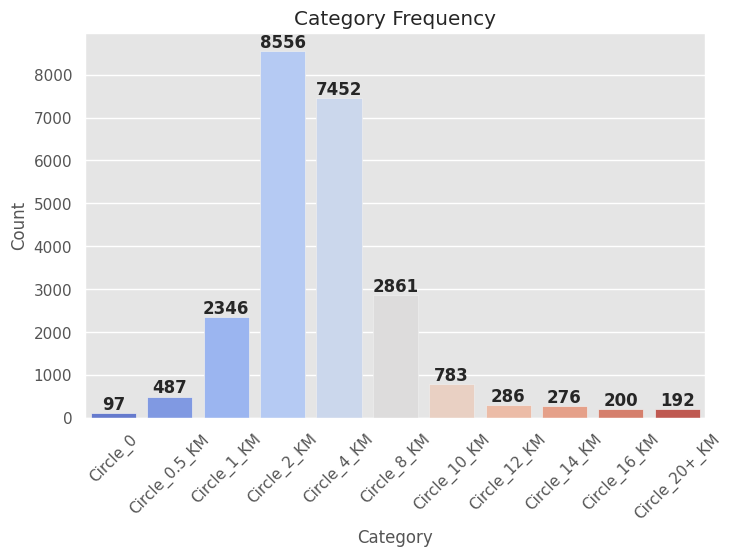

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 5))

# Create count plot
ax = sns.countplot(x='Distance From Center Grouped', data=df, palette='coolwarm')

# Add count labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Frequency')

plt.show()

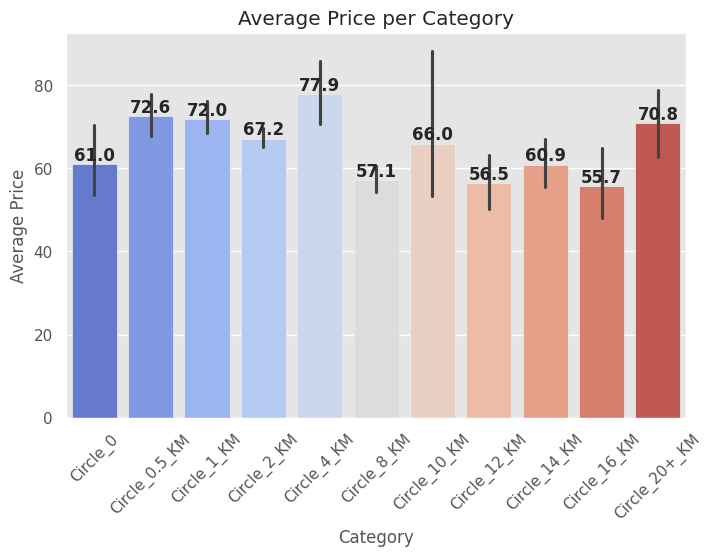

In [81]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Create bar plot (Seaborn automatically calculates the mean)
ax = sns.barplot(x='Distance From Center Grouped', y='Price', data=df, estimator=lambda x: sum(x) / len(x), palette='coolwarm')

# Add average price labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.title('Average Price per Category')

plt.show()


#Accommodates

Accommodates by the data is number of guests booking. Most booking are for 2 people as expected, it should have some effect on the price rate.

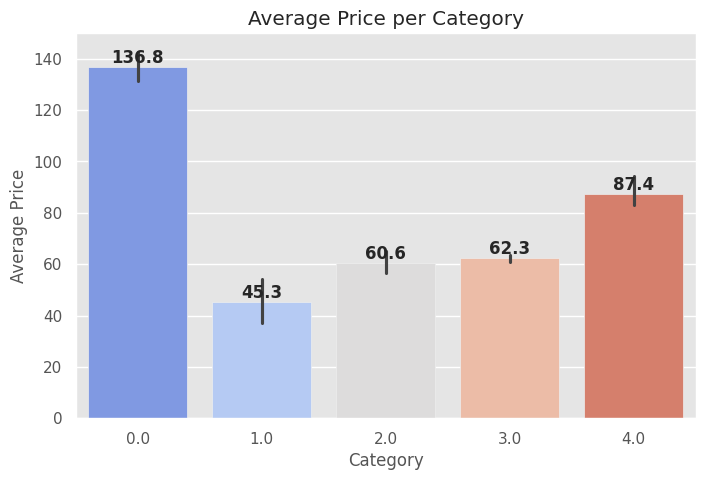

In [82]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Create bar plot (Seaborn automatically calculates the mean)
ax = sns.barplot(x='Accomodates', y='Price', data=df, estimator=lambda x: sum(x) / len(x), palette='coolwarm')

# Add average price labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Category')
plt.ylabel('Average Price')
plt.title('Average Price per Category')

plt.show()


#Bedrooms
lets check if bedrooms effect the Price

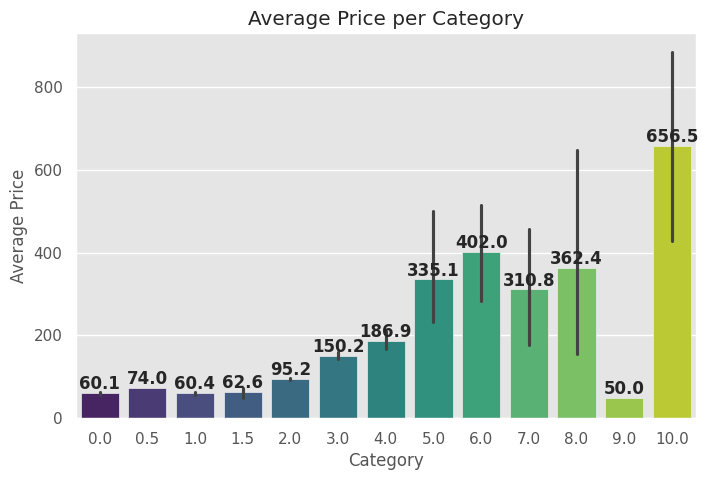

In [83]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Create bar plot (Seaborn automatically calculates the mean)
ax = sns.barplot(x='Bedrooms', y='Price', data=df, estimator=lambda x: sum(x) / len(x), palette='viridis')

# Add average price labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Category')
plt.ylabel('Average Price')
plt.title('Average Price per Category')

plt.show()

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23536 entries, 0 to 23535
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Overall Rating                23536 non-null  float64 
 1   Accuracy Rating               23536 non-null  float64 
 2   Cleanliness Rating            23536 non-null  float64 
 3   Checkin Rating                23536 non-null  float64 
 4   Communication Rating          23536 non-null  float64 
 5   Location Rating               23536 non-null  float64 
 6   Value Rating                  23536 non-null  float64 
 7   Price                         23536 non-null  float64 
 8   Reviews                       23536 non-null  float64 
 9   Bedrooms                      23536 non-null  float64 
 10  Beds                          23536 non-null  float64 
 11  Bathrooms                     23536 non-null  float64 
 12  Is Superhost                  23536 non-null  

# get listing years old


In [86]:
from datetime import datetime

# Convert 'Host Since' to datetime if it's not already
df['Host Since'] = pd.to_datetime(df['Host Since'])

# Extract year and handle potential errors
df['Host Since Year Old'] = df['Host Since'].apply(lambda x: x.year if pd.notnull(x) else 2025).astype(int)
df['Host Since Year Old']  = datetime.now().year - df['Host Since Year Old']
df['Host Since Year Old']
df.drop(columns=["Host Since"], inplace=True)



# Reduce Neighborhood catigories

In [64]:
df.neighbourhood.value_counts()

,count
neighbourhood,
NeukÃ¶lln,3444
Prenzlauer Berg,2995
Kreuzberg,2936
Friedrichshain,2782
Mitte,2212
Wedding,1542
SchÃ¶neberg,1097
Charlottenburg,858
Moabit,828


In [66]:
df["Neighborhood Group"] .value_counts()

,count
Neighborhood Group,
Friedrichshain-Kreuzberg,5726
Mitte,4865
Pankow,3687
NeukÃ¶lln,3587
Charlottenburg-Wilm.,1676
Tempelhof - SchÃ¶neberg,1586
Lichtenberg,743
Treptow - KÃ¶penick,626
Steglitz - Zehlendorf,468


we can see that Neighborhood is very wide catigory , and in any way we have "Neighborhood Group" that already small catigories , then we will drop the neighbourhood and will stay with "Neighborhood Group"



In [87]:
df.drop(columns=["neighbourhood"], inplace=True)

In [89]:
df.to_pickle("/content/drive/MyDrive/kaggle/berline/ready_for_feature_selection.pkl")